<a href="https://colab.research.google.com/github/yeonghun00/stock-notes/blob/main/analysis/market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 코스피/코스닥 시총 100순위 변동 
- 1주일/1달 주도주 분석
- 상승률 변동 (20, 60, 120, 250) 
- 강한 테마/이슈 뉴스검색어와 분석으로 연속성 검증
- 조회수순? 영향력 강한 1주일 이내 공시 분석기
- 앞으로 상장할 주식 1주일 치 이슈에 부합하나
- 업황 분석기: 지난 1주 1달치 업황 상승률/ 거래대금 순위

In [1]:
!pip install exchange_calendars

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# korean font
!wget 'https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip'
!unzip "NotoSansCJKkr-hinted.zip"
!mv NotoSansCJKkr-Medium.otf /usr/share/fonts/truetype/

--2022-07-21 11:58:12--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 74.125.196.128, 2607:f8b0:400c:c36::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|74.125.196.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121163981 (116M) [application/zip]
Saving to: ‘NotoSansCJKkr-hinted.zip.1’

NotoSansCJKkr-hinte 100%[===================>] 115.55M   220MB/s    in 0.5s    

2022-07-21 11:58:13 (220 MB/s) - ‘NotoSansCJKkr-hinted.zip.1’ saved [121163981/121163981]

Archive:  NotoSansCJKkr-hinted.zip
replace LICENSE_OFL.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKkr-Black.otf  
  inflating: NotoSansCJKkr-Bold.otf  
  inflating: NotoSansCJKkr-DemiLight.otf  
  inflating: NotoSansCJKkr-Light.otf  
  inflating: NotoSansCJKkr-Medium.otf  
  i

In [4]:
from matplotlib import font_manager, rc
font_fname = '/usr/share/fonts/truetype/NotoSansCJKkr-Medium.otf'
font_manager.fontManager.addfont(font_fname)
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)
font_manager._rebuild()

In [5]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime, date
import pandas as pd
from io import StringIO
import exchange_calendars as ecals
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

XKRX = ecals.get_calendar("XKRX") # 한국 코드

Daily Community Keywords

In [6]:
url = "https://dcgle.com/galleries/kospi"
result = requests.get(url, headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'})
bs_obj = BeautifulSoup(result.content, "html.parser")
tr = bs_obj.find_all("li", {'class':'p-4 inline-block align-bottom'})
[x.get_text().replace(' ','').replace('\n','') for x in tr]

['주식',
 '삼전',
 '좆스피',
 '국장',
 '운지',
 '코스피',
 '웅지',
 '환율',
 '수익',
 '종목',
 '나스닥',
 '버스',
 '콜보지',
 '대동전자',
 '청담글로벌',
 '씨에스',
 '주식책',
 '일동',
 '시초가',
 'auck',
 '베어링',
 '품절주',
 '양지사',
 '상한가',
 '일동제약',
 '원전',
 '공매도',
 '공구우먼',
 '대성창투',
 '매국',
 '코스닥',
 '외인',
 '음전',
 '한남드라',
 '만전자',
 '시총',
 '노스닥',
 '낼려면',
 '인버스',
 '버스충',
 '원유',
 '개미들',
 '살껄',
 '저놈',
 '신사임당',
 '미장',
 '대호황',
 '하닉',
 '범한',
 '리빙',
 '오르노',
 '공모주',
 '폭등',
 '성일하',
 '단타',
 '코갤',
 '이재용',
 '제약',
 '증시',
 '모건',
 '2300',
 '남자의',
 '저점',
 '좆버스',
 '몰빵',
 '2400',
 '초에',
 '삼성전자',
 '반등',
 '짱개',
 '크래프',
 '주식으로',
 '내일도',
 '1300',
 '점마',
 '현대차',
 '매도',
 '딸배',
 '니케',
 '없제',
 '개새끼야',
 '호로',
 '마트',
 '하락',
 '주가',
 '좆나',
 '안다',
 '레버',
 '유럽',
 '두창',
 '오르면',
 '테마',
 '반도체',
 '흑우',
 '민주당',
 '상승',
 '아버지',
 '외국인',
 '손절',
 '계좌']

In [7]:
kospi_df = fdr.DataReader('KS11')
kospi_df['Change'] = kospi_df['Change'] + 1
kospi_df

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1981-05-01,123.60,123.60,123.60,123.60,3330000.0,1.0098
1981-05-02,123.50,123.50,123.50,123.50,2040000.0,0.9992
1981-05-04,120.60,120.60,120.60,120.60,1930000.0,0.9765
1981-05-06,120.70,120.70,120.70,120.70,1690000.0,1.0008
1981-05-07,119.30,119.30,119.30,119.30,1480000.0,0.9884
...,...,...,...,...,...,...
2022-07-15,2330.98,2335.12,2337.30,2293.45,319680000.0,1.0037
2022-07-18,2375.25,2350.48,2376.50,2344.12,324360000.0,1.0190
2022-07-19,2370.97,2367.52,2372.74,2359.59,339380000.0,0.9982


In [8]:
print('mean: ', kospi_df['Change'].mean())
print('var : ', kospi_df['Change'].var())
print('skewness : ', kospi_df['Change'].skew())
print('kurtosis : ', kospi_df['Change'].kurt())

mean:  1.0003772735540195
var :  0.0002120627986049249
skewness :  -0.05630234817699965
kurtosis :  5.503172323114391


In [9]:
import random
import math
import numpy as np

m = kospi_df['Change'].mean()
var = kospi_df['Change'].var()

sample_num = 1000
periods = 250 # 250*40

dates = pd.date_range(start=date.today(), periods=periods)
close_li = [pd.DataFrame({'Change':[random.gauss(m, math.sqrt(var)) for i in range(periods)]}, index=dates) for x in range(sample_num)]
close_li = list(map(lambda x: np.cumprod(x).rename(columns={'Change':'Close'}) * kospi_df['Close'][-1], close_li))

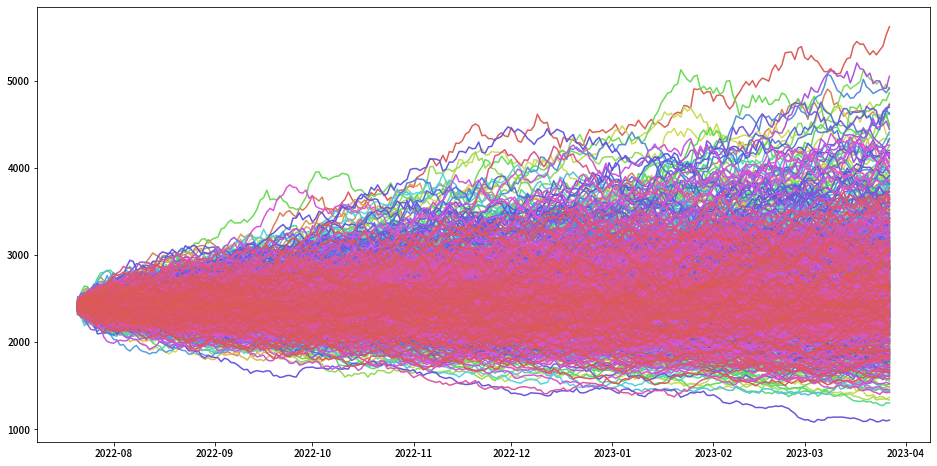

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(16, 8))
ax = plt.subplot(111)
colors = list(sns.color_palette("hls", sample_num).as_hex())

for i, j in enumerate(close_li):
  ax.plot(j['Close'], color=colors[i]) #, label=i+1)

plt.show()

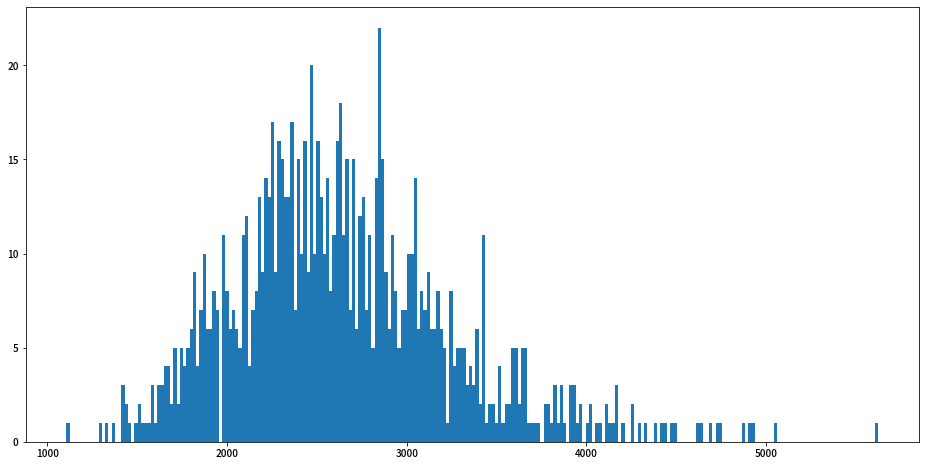

In [11]:
plt.figure(figsize=(16, 8))
end_data = [x.iloc[-1].values[0] for x in close_li]
plt.hist(end_data, bins=250)
plt.show()

In [12]:
# 95% 신뢰구간
max95 = np.mean(end_data) + (1.96 * (np.std(end_data) / math.sqrt(len(end_data))))
min95 = np.mean(end_data) - (1.96 * (np.std(end_data) / math.sqrt(len(end_data))))
print('95% Min: ', round(min95))
print('95% Max: ', round(max95))

# 평균
print('Mean: ', np.mean([round(x.iloc[-1].values[0],0) for x in close_li]))

# 중앙
print('Median: ', np.median([round(x.iloc[-1].values[0],0) for x in close_li]))

95% Min:  2609
95% Max:  2686
Mean:  2647.388
Median:  2584.5


In [13]:
kosdaq_df = fdr.DataReader('KQ11')
kosdaq_df['Change'] = kosdaq_df['Change'] + 1

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2001-01-02,557.00,502.50,559.60,502.50,201210.0,1.0593
2001-01-03,569.00,545.80,579.90,539.30,284990.0,1.0215
2001-01-04,615.10,617.70,621.50,609.00,233130.0,1.0810
2001-01-05,625.20,614.50,630.70,602.50,367230.0,1.0164
2001-01-08,650.00,614.90,657.00,614.00,358620.0,1.0397
...,...,...,...,...,...,...
2022-07-15,762.39,768.41,769.29,754.33,850290000.0,0.9952
2022-07-18,776.72,774.40,776.72,773.86,706230.0,1.0188
2022-07-19,782.33,773.73,782.33,771.69,727540.0,1.0072


In [14]:
print('mean: ', kosdaq_df['Change'].mean())
print('var : ', kosdaq_df['Change'].var())
print('skewness : ', kosdaq_df['Change'].skew())
print('kurtosis : ', kosdaq_df['Change'].kurt())

mean:  1.0002054794520547
var :  0.0002530752515015015
skewness :  -0.690821389115325
kurtosis :  6.328216626162469


In [15]:
m = kosdaq_df['Change'].mean()
var = kosdaq_df['Change'].var()

sample_num = 1000
periods = 250 # 250*40

dates = pd.date_range(start=date.today(), periods=periods)
close_li = 0
close_li = [pd.DataFrame({'Change':[random.gauss(m, math.sqrt(var)) for i in range(periods)]}, index=dates) for x in range(sample_num)]
close_li = list(map(lambda x: np.cumprod(x).rename(columns={'Change':'Close'}) * kosdaq_df['Close'][-1], close_li))

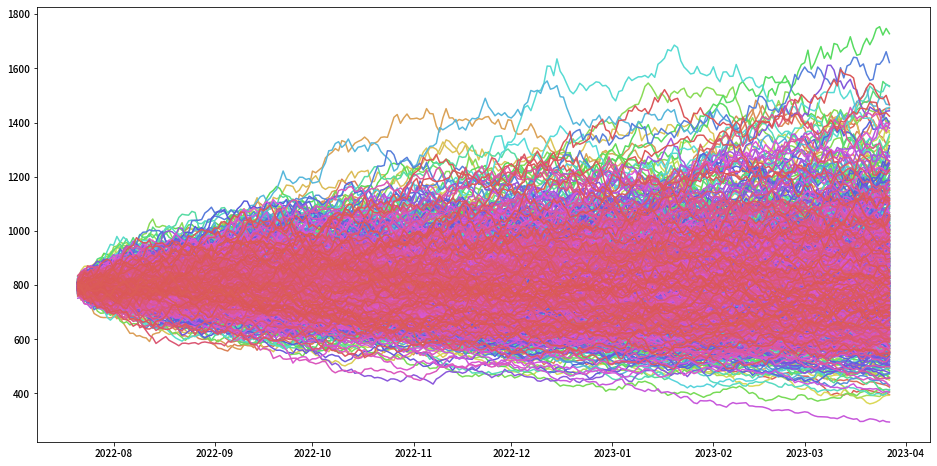

In [16]:
fig = plt.figure(figsize=(16, 8))
ax = plt.subplot(111)
colors = list(sns.color_palette("hls", sample_num).as_hex())

for i, j in enumerate(close_li):
  ax.plot(j['Close'], color=colors[i]) #, label=i+1)

plt.show()

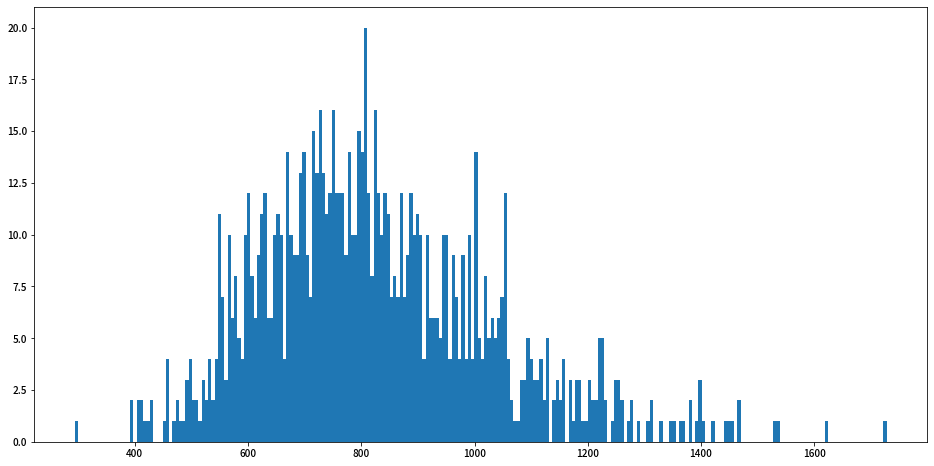

In [17]:
plt.figure(figsize=(16, 8))
end_data = [x.iloc[-1].values[0] for x in close_li]
plt.hist(end_data, bins=250)
plt.show()

In [18]:
# 95% 신뢰구간
max95 = np.mean(end_data) + (1.96 * (np.std(end_data) / math.sqrt(len(end_data))))
min95 = np.mean(end_data) - (1.96 * (np.std(end_data) / math.sqrt(len(end_data))))
print('95% Min: ', round(min95))
print('95% Max: ', round(max95))

# 평균
print('Mean: ', np.mean([round(x.iloc[-1].values[0],0) for x in close_li]))

# 중앙
print('Median: ', np.median([round(x.iloc[-1].values[0],0) for x in close_li]))

95% Min:  815
95% Max:  840
Mean:  827.411
Median:  801.5


In [19]:
market_type = {
    'all':'ALL',
    'kospi':'STK',
    'kosdaq':'KSQ'
}

def get_ranking(market, ranking_type, start_date, end_date):
  gen_url = 'http://data.krx.co.kr/comm/fileDn/GenerateOTP/generate.cmd'
  url = ''
  if ranking_type == 'highest': url = 'dbms/MDC/EASY/ranking/MDCEASY01501'
  elif ranking_type == 'traded': url = 'dbms/MDC/EASY/ranking/MDCEASY01601'
  elif ranking_type == 'marketcap': url = 'dbms/MDC/EASY/ranking/MDCEASY01701'
  start_date = start_date.strftime('%Y%m%d') if type(start_date) != str else start_date
  end_date = end_date.strftime('%Y%m%d') if type(end_date) != str else end_date
  data = {
    'locale': 'ko_KR',
    'mktId': market,
    'itmTpCd': '1',
    'itmTpCd2': '1',
    'trdDd': start_date,
    'strtDd': start_date,
    'endDd': end_date,
    'stkprcTpCd': 'Y',
    'share': '1',
    'money': '1',
    'csvxls_isNo': 'false',
    'name': 'fileDown',
    'url': url
  }
  gen_key = requests.post(gen_url, data=data).text
  down_url = 'http://data.krx.co.kr/comm/fileDn/download_csv/download.cmd'
  data = {'code':gen_key}
  r = requests.post(down_url, data=data)
  r.encoding = 'EUC-KR'
  return pd.read_csv(StringIO(r.text))

In [20]:
def get_ranking_df(start='20220613', end='20220712', freq='1D', market='kospi', ranking_type='marketcap'):
  df = pd.DataFrame()
  for d in pd.date_range(start=start, end=end, freq=freq):
    t = pd.DataFrame()
    dt = d
    if XKRX.is_session(dt) == False:
      dt = XKRX.next_open(dt).replace(tzinfo=None)
    t = get_ranking(market_type[market], ranking_type, dt.strftime('%Y%m%d'), dt.strftime('%Y%m%d'))[['순위', '종목명']]
    t['date'] = dt
    df = df.append(t, ignore_index=True)
  return df

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FixedFormatter, FixedLocator

def plot_bump(df='', n_top_ranked=10, title='Title'):
  top_sources = df[df["date"] == df["date"].max()].nsmallest(n_top_ranked, "순위")

  fig, ax = plt.subplots(figsize=(16, 8), subplot_kw=dict(ylim=(0.5, 0.5 + n_top_ranked)))
  #ax.xaxis.set_major_locator(MultipleLocator(1))
  ax.yaxis.set_major_locator(MultipleLocator(1))

  yax2 = ax.secondary_yaxis("right")
  yax2.yaxis.set_major_locator(FixedLocator(top_sources["순위"].to_list()))
  yax2.yaxis.set_major_formatter(FixedFormatter(top_sources["종목명"].to_list()))

  for k, (i, j) in enumerate(df.groupby("종목명")):
    ax.plot("date", "순위", "o-", linewidth=3, markersize=7, data=j, mfc="w")

  ax.invert_yaxis()
  ax.set(xlabel="Date", ylabel="Rank", title=title)
  plt.tight_layout()

In [22]:
from dateutil import relativedelta

t = date.today()
today = t.strftime('%Y%m%d') if XKRX.is_session(t) else XKRX.previous_open(t).replace(tzinfo=None).strftime('%Y%m%d')
w = (date.today() - relativedelta.relativedelta(weeks=1))
previous_week = w.strftime('%Y%m%d') if XKRX.is_session(w) else XKRX.next_open(w).replace(tzinfo=None).strftime('%Y%m%d')
m = (date.today() - relativedelta.relativedelta(months=1))
previous_month = m.strftime('%Y%m%d') if XKRX.is_session(m) else XKRX.next_open(m)
y = (date.today() - relativedelta.relativedelta(years=1))
previous_year = y.strftime('%Y%m%d') if XKRX.is_session(y) else XKRX.next_open(y).replace(tzinfo=None).strftime('%Y%m%d')

Market Cap Ranking Change

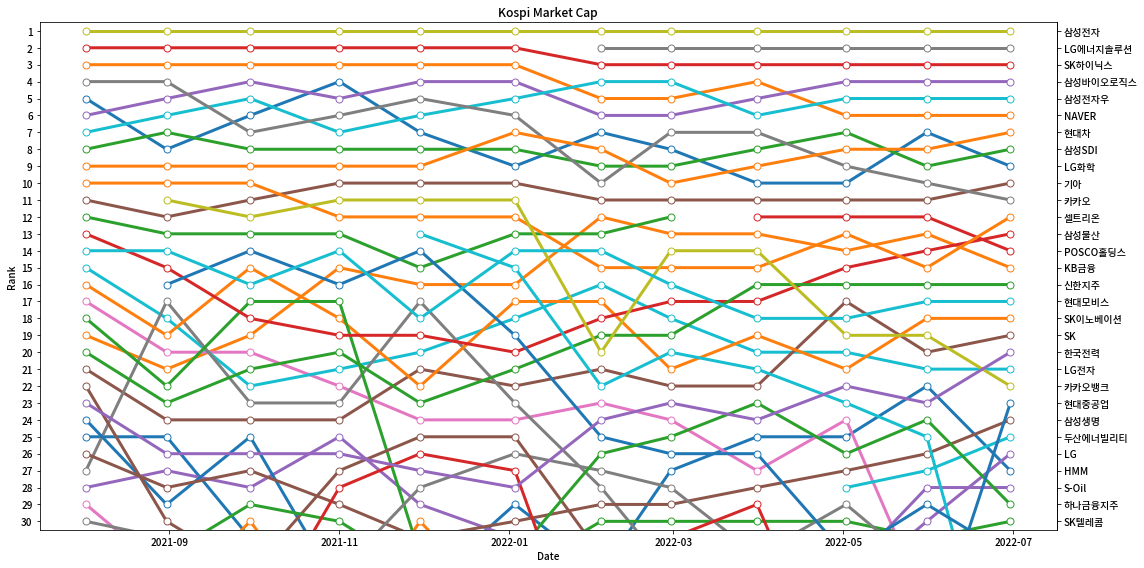

In [23]:
kospi_marketcap_ranking_df = get_ranking_df(previous_year, today, freq='1M', market='kospi', ranking_type='marketcap')
plot_bump(kospi_marketcap_ranking_df, 30, "Kospi Market Cap")

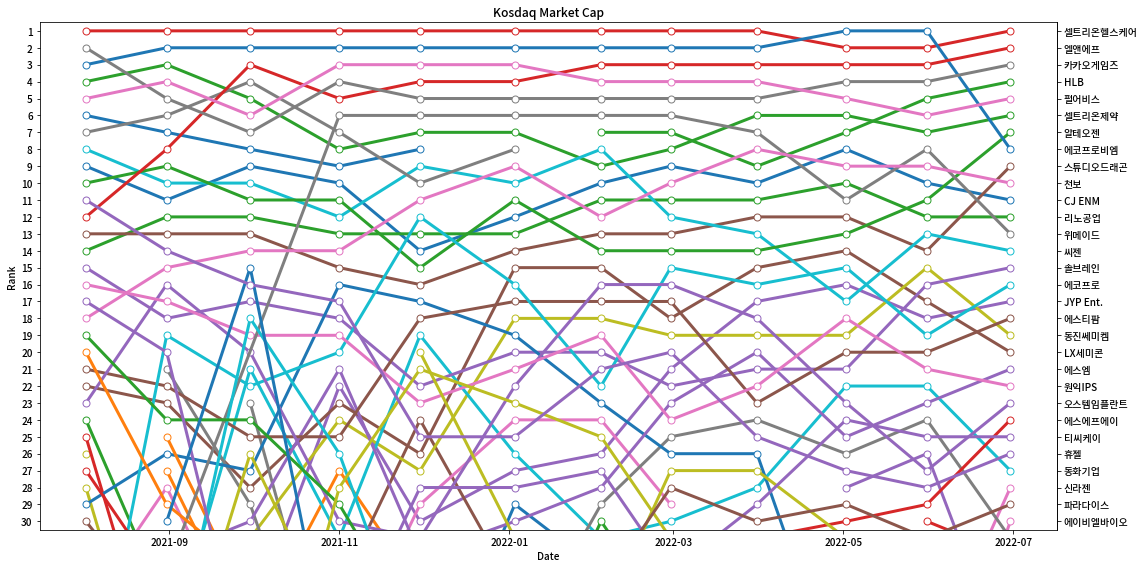

In [24]:
kosdaq_marketcap_ranking_df = get_ranking_df(previous_year, today, freq='1M', market='kosdaq', ranking_type='marketcap')
plot_bump(kosdaq_marketcap_ranking_df, 30, "Kosdaq Market Cap")

Annual King

In [25]:
get_ranking(market_type['kospi'], 'traded', previous_year, today).sort_values('등락률', ascending=False).head(10)

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
10,11,249420,일동제약,KOSPI,15800,37400,21600,136.71,776687484,3144484,35501764403050,143731839688
30,31,11700,한신기계,KOSPI,4245,8780,4535,106.83,2047676854,8290190,14886454508815,60269046594
15,16,11070,LG이노텍,KOSPI,235500,341500,106000,45.01,85197015,344927,26849664946227,108703096948
23,24,93370,후성,KOSPI,12050,17450,5400,44.81,874262456,3539524,17540569173950,71014450097
45,46,5070,코스모신소재,KOSPI,41050,53400,12350,30.09,224035321,907026,10769524656500,43601314399
37,38,52690,한전기술,KOSPI,61500,63300,1800,2.93,162619202,658377,12753272543800,51632682364
40,41,10060,OCI,KOSPI,117000,118000,1000,0.85,97868089,396227,11795427802300,47754768430
21,22,105560,KB금융,KOSPI,50800,48650,-2150,-4.23,327435410,1325649,18306120504696,74113848197
35,36,55550,신한지주,KOSPI,37550,35850,-1700,-4.53,337665142,1367065,13160690563696,53282148031
14,15,270,기아,KOSPI,87100,82000,-5100,-5.86,367198732,1486635,29849202744317,120846974673


In [26]:
get_ranking(market_type['kosdaq'], 'traded', previous_year, today).sort_values('등락률', ascending=False).head(10)

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
30,31,258830,세종메디칼,KOSDAQ,2020,7120,5100,252.48,1718331708,6956809,10630069767070,43036719705
21,22,90710,휴림로봇,KOSDAQ,1050,3015,1965,187.14,5636105423,22818241,13495688705851,54638415813
28,29,5860,한일사료,KOSDAQ,2245,6010,3765,167.71,1644782475,6659038,10834406515525,43863993990
18,19,53050,지에스이,KOSDAQ,2115,4985,2870,135.70,2975592525,12046933,14227386885162,57600756620
35,36,278650,노터스,KOSDAQ,3120,7300,4180,133.97,606701001,2456279,9308652684380,37686852973
0,1,112040,위메이드,KOSDAQ,30411,63600,33189,109.13,325759784,1318866,40463510342472,163819879929
1,2,66970,엘앤에프,KOSDAQ,114700,224300,109600,95.55,207881026,841624,40093990905802,162323849821
3,4,247540,에코프로비엠,KOSDAQ,66342,115000,48658,73.34,103033302,417139,36131772453319,146282479568
37,38,222800,심텍,KOSDAQ,23300,40250,16950,72.75,228712824,925963,9200195926000,37247756785
49,50,215100,로보로보,KOSDAQ,4325,7460,3135,72.49,930931662,3768954,7600508197592,30771288249


Montly King

In [27]:
get_ranking(market_type['kospi'], 'traded', previous_month, today).sort_values('등락률', ascending=False).head(10)

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
42,43,11000,진원생명과학,KOSPI,10100,14650,4550,45.05,66817070,2905090,943841789370,41036599538
40,41,19170,신풍제약,KOSPI,22150,31950,9800,44.24,32950633,1432636,965611484000,41983108000
44,45,4310,현대약품,KOSPI,4180,5870,1690,40.43,145618495,6331239,861761527890,37467892517
2,3,302440,SK바이오사이언스,KOSPI,98700,130500,31800,32.22,33139917,1440866,4306247316000,187228144174
12,13,68270,셀트리온,KOSPI,152500,182500,30000,19.67,11825775,514164,2107147553524,91615111023
29,30,51900,LG생활건강,KOSPI,620000,722000,102000,16.45,1636616,71157,1121580429768,48764366512
43,44,1250,GS글로벌,KOSPI,3215,3640,425,13.22,253759314,11033014,896046138050,38958527741
28,29,1470,삼부토건,KOSPI,1815,2015,200,11.02,499313515,21709283,1139143097070,49527960742
3,4,5380,현대차,KOSPI,170500,189000,18500,10.85,22697867,986864,4100412095114,178278786744
37,38,12330,현대모비스,KOSPI,199500,219500,20000,10.03,5010924,217866,1029714598500,44770199935


In [28]:
get_ranking(market_type['kosdaq'], 'traded', previous_month, today).sort_values('등락률', ascending=False).head(10)

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
47,48,288980,모아데이타,KOSDAQ,1851,7950,6099,329.50,36344760,1580207,652848349860,28384710863
16,17,56700,신화인터텍,KOSDAQ,2320,5670,3350,144.40,305480695,13281769,1262507976715,54891651162
42,43,257720,실리콘투,KOSDAQ,2025,4570,2545,125.68,40079770,1742599,729756760090,31728554787
22,23,258830,세종메디칼,KOSDAQ,3425,7120,3695,107.88,173111378,7526582,1090918149400,47431223887
35,36,376180,피코그램,KOSDAQ,24300,42500,18200,74.90,21811980,948347,796694078800,34638872991
3,4,205470,휴마시스,KOSDAQ,12900,21800,8900,68.99,160184466,6964542,3111156874200,135267690183
9,10,256840,한국비엔씨,KOSDAQ,7640,12800,5160,67.54,121915776,5300686,1394012714290,60609248447
39,40,253840,수젠텍,KOSDAQ,9940,16600,6660,67.00,46601867,2026168,757518399610,32935582592
20,21,323990,박셀바이오,KOSDAQ,38350,60800,22450,58.54,20147173,875964,1117380812200,48581774443
25,26,84650,랩지노믹스,KOSDAQ,5410,8450,3040,56.19,122424117,5322788,1002140693500,43571334500


Weekly King

In [29]:
get_ranking(market_type['kospi'], 'traded', previous_week, today).sort_values('등락률', ascending=False).head(10)

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
37,38,5420,코스모화학,KOSPI,14800,18550,3750,25.34,11322462,1887077,198852654850,33142109142
6,7,11000,진원생명과학,KOSPI,11750,14650,2900,24.68,52115629,8685938,780480155850,130080025975
33,34,120030,조선선재,KOSPI,137500,166500,29000,21.09,1360015,226669,214947057000,35824509500
38,39,3000,부광약품,KOSPI,8590,10300,1710,19.91,20261025,3376838,197732615980,32955435997
9,10,19170,신풍제약,KOSPI,26650,31950,5300,19.89,21308226,3551371,693145825500,115524304250
41,42,139480,이마트,KOSPI,102500,114000,11500,11.22,1778665,296444,191292763850,31882127308
44,45,64350,현대로템,KOSPI,18200,20200,2000,10.99,9184776,1530796,183316753550,30552792258
8,9,51910,LG화학,KOSPI,517000,569000,52000,10.06,1366505,227751,729017367000,121502894500
18,19,96770,SK이노베이션,KOSPI,166500,183000,16500,9.91,2119980,353330,370079115000,61679852500
45,46,3670,포스코케미칼,KOSPI,108500,118500,10000,9.22,1569881,261647,178749702000,29791617000


In [30]:
get_ranking(market_type['kosdaq'], 'traded', previous_week, today).sort_values('등락률', ascending=False).head(10)

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
33,34,288980,모아데이타,KOSDAQ,3501,7950,4449,127.08,14196882,2366147,212424312090,35404052015
3,4,258830,세종메디칼,KOSDAQ,4380,7120,2740,62.56,135272926,22545488,937110737185,156185122864
37,38,52020,에스티큐브,KOSDAQ,8330,12800,4470,53.66,16186637,2697773,182977909650,30496318275
24,25,27830,대성창투,KOSDAQ,2965,4510,1545,52.11,65005260,10834210,271032312510,45172052085
2,3,323990,박셀바이오,KOSDAQ,41450,60800,19350,46.68,17520160,2920027,1013209321700,168868220283
29,30,82850,우리바이오,KOSDAQ,3175,4295,1120,35.28,56821807,9470301,232863475275,38810579213
46,47,44060,조광ILI,KOSDAQ,2135,2875,740,34.66,40447116,6741186,151703292855,25283882143
34,35,7390,네이처셀,KOSDAQ,19300,25900,6600,34.20,8615892,1435982,198754103800,33125683967
41,42,297570,알로이스,KOSDAQ,1745,2315,570,32.66,77872166,12978694,171135510600,28522585100
5,6,86520,에코프로,KOSDAQ,68900,88800,19900,28.88,8967812,1494635,745179380300,124196563383


Daily King

In [31]:
get_ranking(market_type['kospi'], 'traded', today, today).sort_values('등락률', ascending=False).head(10)

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
34,35,8110,대동전자,KOSPI,8090,8900,810,10.01,4170621,4170621,38698097150,38698097150
38,39,3070,코오롱글로벌,KOSPI,18100,19400,1300,7.18,1852570,1852570,37108415150,37108415150
15,16,3000,부광약품,KOSPI,9630,10300,670,6.96,6726849,6726849,68849975100,68849975100
32,33,308170,센트랄모텍,KOSPI,16300,17350,1050,6.44,2233385,2233385,40090641900,40090641900
3,4,51910,LG화학,KOSPI,540000,569000,29000,5.37,363430,363430,203441532000,203441532000
13,14,259960,크래프톤,KOSPI,247500,258500,11000,4.44,288427,288427,73879272500,73879272500
9,10,9150,삼성전기,KOSPI,139500,144500,5000,3.58,729728,729728,105068273500,105068273500
23,24,139480,이마트,KOSPI,110500,114000,3500,3.17,426327,426327,48427303000,48427303000
18,19,96770,SK이노베이션,KOSPI,178500,183000,4500,2.52,343756,343756,62217907500,62217907500
12,13,86790,하나금융지주,KOSPI,36600,37400,800,2.19,2235306,2235306,82553209690,82553209690


In [32]:
get_ranking(market_type['kosdaq'], 'traded', today, today).sort_values('등락률', ascending=False).head(10)

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
24,25,288980,모아데이타,KOSDAQ,6120,7950,1830,29.90,7751143,7751143,59109714910,59109714910
0,1,328130,루닛,KOSDAQ,30800,40000,9200,29.87,6896842,6896842,253388294700,253388294700
2,3,56700,신화인터텍,KOSDAQ,4720,5670,950,20.13,36586786,36586786,201094072640,201094072640
21,22,30960,양지사,KOSDAQ,12250,14700,2450,20.00,4499624,4499624,61189363850,61189363850
4,5,82850,우리바이오,KOSDAQ,3660,4295,635,17.35,37895994,37895994,162214993510,162214993510
9,10,27360,아주IB투자,KOSDAQ,2900,3375,475,16.38,29225609,29225609,100508950130,100508950130
23,24,86960,한컴MDS,KOSDAQ,14000,16150,2150,15.36,3635888,3635888,60243727450,60243727450
1,2,403870,HPSP,KOSDAQ,56500,64000,7500,13.27,3564043,3564043,222615823500,222615823500
12,13,289220,자이언트스텝,KOSDAQ,23850,26850,3000,12.58,3174663,3174663,86632779950,86632779950
35,36,291230,엔피,KOSDAQ,7500,8220,720,9.60,4279514,4279514,35709544660,35709544660


In [33]:
sector_dic = {'에너지': 'WI100', '화학': 'WI110', '비철금속': 'WI200', '철강': 'WI210', '건설': 'WI220', '기계': 'WI230', '조선': 'WI240', '상가,자본재': 'WI250', \
       '운송': 'WI260', '자동차': 'WI300', '화장품,의류': 'WI310', '호텔,레저': 'WI320', '미디어,교육': 'WI330', '소매(유통)': 'WI340', '필수소비재': 'WI400', \
       '건강관리': 'WI410', '은행': 'WI500', '증권': 'WI510', '보험': 'WI520', '소프트웨어': 'WI600', 'IT하드웨어': 'WI610', '반도체': 'WI620', 'IT가전': 'WI630', \
       '디스플레이': 'WI640', '전기통신서비스': 'WI700', '유틸리티': 'WI800'}

sheets = ['Index Value', 'Return', 'Valuation Ratio', 'Risk & Performance Ratio']

In [34]:
def get_sector(sector, term, current_date, pre_year=3):
  id = sector_dic[sector]
  name = 'WI26' + sector
  current_date = current_date if XKRX.is_session(current_date) else XKRX.previous_open(current_date)
  previous_date = (datetime.strptime(current_date, '%Y%m%d') - relativedelta.relativedelta(years=pre_year))
  previous_date = previous_date if XKRX.is_session(previous_date) else XKRX.next_open(previous_date)

  current_date = datetime.strptime(current_date, '%Y%m%d').strftime('%Y-%m-%d') \
  if type(current_date) == str else current_date.strftime('%Y-%m-%d')
  previous_date = datetime.strptime(previous_date, '%Y%m%d').strftime('%Y-%m-%d') \
  if type(previous_date) == str else previous_date.strftime('%Y-%m-%d')
  t = {
      'day' : '1',
      'week' : '2',
      'month' : '3',
      'quarter' : '4'
  }
  headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'}
  url = 'https://www.wiseindex.com/DataCenter/ExportToExcel?index_ids=' + \
    id + '&index_names=' + name + '&tabs=1,2,3,4&fromDT=' + \
    previous_date + '&endDT=' + current_date + '&term=' + t[term] + '&isEnd=1'
  res = requests.get(url, headers = headers)
  xls = pd.ExcelFile(res.content)
  return xls

In [35]:
energy = get_sector('에너지', 'month', today, 3)

In [36]:
def get_sheet(elx, sheets):
  df = pd.read_excel(elx, sheets) 
  df.columns = df.iloc[0]
  df = df.iloc[::-1]
  df = df.drop(0)
  df = df[1:].set_index('일자')
  return df

In [37]:
sectors = {}
for sector in list(sector_dic):
  sectors[sector] = get_sheet(get_sector(sector, 'month', today, 3), sheets[0])

Sector Market Cap

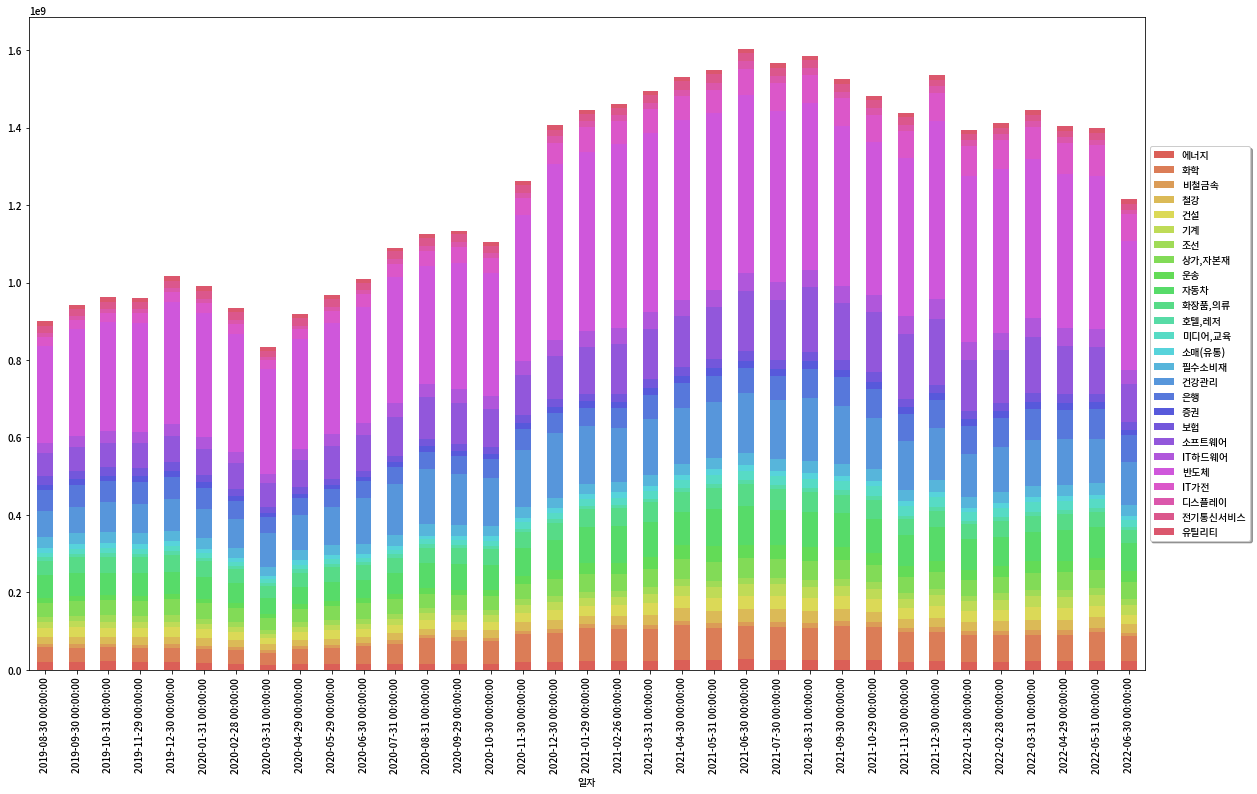

In [41]:
data = dict([(x,sectors[x]['시가총액 (백만)']) for x in sectors])

colors = list(sns.color_palette("hls", len(sector_dic)).as_hex())

fig = plt.figure(figsize=(20, 12))
ax = plt.subplot(111)
pd.DataFrame(data).plot.bar(stacked=True, ax=ax, color=colors)
ax.legend(loc='center left',  bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
plt.show()

Sector Traded Value / Market

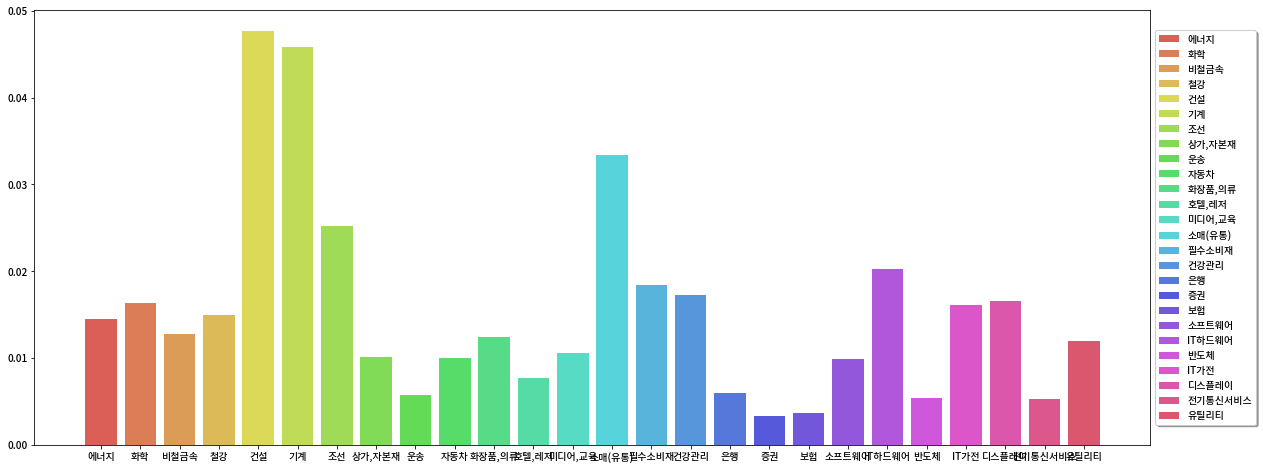

In [42]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20, 8))
ax = plt.subplot(111)

for i, sector in enumerate(list(sector_dic)):
  ax.bar(sector, (sectors[sector]['거래대금 (백만)']/sectors[sector]['시가총액 (백만)'])[-1], color=colors[i], label=sector)

ax.legend(loc='center left',  bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
plt.show()

Sector Momentum

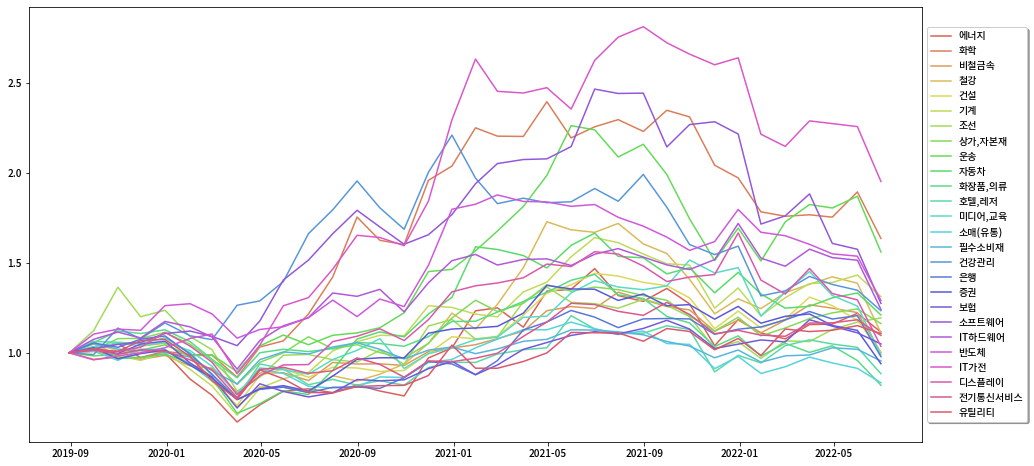

In [43]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(16, 8))
ax = plt.subplot(111)
colors = list(sns.color_palette("hls", len(sector_dic)).as_hex())

for i, sector in enumerate(list(sector_dic)):
  ax.plot(sectors[sector]['지수값']/sectors[sector]['지수값'][0], color=colors[i], label=sector)

ax.legend(loc='center left',  bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
plt.show()